In [1]:
# importing the libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the file
data = pd.read_csv('dr.csv')

In [3]:
# first 5 rows of the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# shape of the data
data.shape

(550068, 12)

In [5]:
# number of missing values in each variable
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
# percentage of missing values in each variable
data.isnull().sum()/len(data)*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

In [7]:
# saving missing values in a variable
a = data.isnull().sum()/len(data)*100

In [8]:
# saving column names in a variable
variables = data.columns

In [9]:
# new variable to store variables having missing values less than a threshold
variable = [ ]
for i in range(data.columns.shape[0]):
    if a[i]<=30:   #setting the threshold as 40%
        variable.append(variables[i])

In [10]:
variable

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Purchase']

In [11]:
# creating a new dataframe using the above variables
new_data = data[variable]

In [12]:
# first five rows of the new data
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [13]:
# percentage of missing values in each variable of new data
new_data.isnull().sum()/len(new_data)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

In [14]:
# dropping the targer variable
df = new_data.drop('Purchase',axis=1)

In [15]:
# calculalting the correlation between independent variables
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1
User_ID,1.000000,-0.023971,0.020443,0.003825
Occupation,-0.023971,1.000000,0.024280,-0.007618
Marital_Status,0.020443,0.024280,1.000000,0.019888
Product_Category_1,0.003825,-0.007618,0.019888,1.000000


In [16]:
# creating correlation matrix
corr_matrix = df.corr().abs()

In [17]:
# selecting upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#  correlation matrix and identifying most correlated features

In [18]:
upper

,User_ID,Occupation,Marital_Status,Product_Category_1
User_ID,NaN,0.023971,0.020443,0.003825
Occupation,NaN,NaN,0.024280,0.007618
Marital_Status,NaN,NaN,NaN,0.019888
Product_Category_1,NaN,NaN,NaN,NaN


In [19]:
# finding index of variables with correlation greater than 0.6
to_drop = [column for column in upper.columns if any(upper[column] > 0.02)]

In [20]:
to_drop

['Occupation', 'Marital_Status']

In [21]:
# dropping the variable and creating new dataset
new1_data = new_data.drop(new_data[to_drop], axis=1)

In [22]:
# first five rows of the new data
new1_data.head()

,User_ID,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,A,2,3,8370
1,1000001,P00248942,F,0-17,A,2,1,15200
2,1000001,P00087842,F,0-17,A,2,12,1422
3,1000001,P00085442,F,0-17,A,2,12,1057
4,1000002,P00285442,M,55+,C,4+,8,7969


In [23]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [24]:
# percentage of missing values in each variable of new data
new_data.isnull().sum()/len(new_data)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Purchase                      0.0
dtype: float64

In [25]:
new_data['User_ID'] = new_data['User_ID'] - 1000000

<ipython-input-25-b561a073f8dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['User_ID'] = new_data['User_ID'] - 1000000


In [26]:
enc = LabelEncoder()

In [27]:
new_data['User_ID'] = enc.fit_transform(new_data['User_ID'])

<ipython-input-27-a9c032c81561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['User_ID'] = enc.fit_transform(new_data['User_ID'])


In [28]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,P00069042,F,0-17,10,A,2,0,3,8370
1,0,P00248942,F,0-17,10,A,2,0,1,15200
2,0,P00087842,F,0-17,10,A,2,0,12,1422
3,0,P00085442,F,0-17,10,A,2,0,12,1057
4,1,P00285442,M,55+,16,C,4+,0,8,7969


In [29]:
new_data['Product_ID'] = new_data['Product_ID'].str.replace('P00', '')

<ipython-input-29-ee3e13738636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Product_ID'] = new_data['Product_ID'].str.replace('P00', '')


In [30]:
scaler = StandardScaler()

In [31]:
new_data['Product_ID'] = scaler.fit_transform(new_data['Product_ID'].values.reshape(-1, 1))

<ipython-input-31-70274dbd2763>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Product_ID'] = scaler.fit_transform(new_data['Product_ID'].values.reshape(-1, 1))


In [32]:
new_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,0,-1.028774,F,0-17,10,A,2,0,3,8370
1,0,0.722139,F,0-17,10,A,2,0,1,15200
2,0,-0.845799,F,0-17,10,A,2,0,12,1422
3,0,-0.869157,F,0-17,10,A,2,0,12,1057
4,1,1.077382,M,55+,16,C,4+,0,8,7969


In [33]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  float64
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 42.0+ MB


In [34]:
cat_col = ['Gender', 'City_Category']
num_col = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1']

In [35]:
# Impute missing values
new_data = new_data.fillna(0)

In [36]:
new_data['Age'] = new_data['Age'].map({'0-17': 15,
                               '18-25': 21,
                               '26-35': 30,
                               '36-45': 40,
                               '46-50': 48,
                               '51-55': 53,
                               '55+': 60})

In [37]:
# Modify Stay_In_Current_City_Years

new_data['Stay_In_Current_City_Years'] = new_data['Stay_In_Current_City_Years'].map({'0': 0,
                                                                               '1': 1,
                                                                                '2': 2,
                                                                                '3': 3,
                                                                                '4+': 4})

In [38]:
# Encode categorical columns

encoder = LabelEncoder()

for col in cat_col:
    new_data[col] = encoder.fit_transform(new_data[col])

In [39]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  float64
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int32(2), int64(7)
memory usage: 37.8 MB


In [40]:
# Scale numerical columns

scaler = StandardScaler()

for col in num_col:
    new_data[col] = scaler.fit_transform(new_data[col].values.reshape(-1, 1))

In [41]:
from scipy.stats import zscore
new_data_scaled=new_data.apply(zscore)
new_data_scaled.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,-1.749661,-1.028774,-1.746513,-1.741228,0.294864,-1.371516,0.109801,-0.833018,-0.610809,-0.177973
1,-1.749661,0.722139,-1.746513,-1.741228,0.294864,-1.371516,0.109801,-0.833018,-1.118912,1.181756
2,-1.749661,-0.845799,-1.746513,-1.741228,0.294864,-1.371516,0.109801,-0.833018,1.675656,-1.561193
3,-1.749661,-0.869157,-1.746513,-1.741228,0.294864,-1.371516,0.109801,-0.833018,1.675656,-1.633858
4,-1.749068,1.077382,0.572570,2.332202,1.214734,1.259336,1.660861,-0.833018,0.659449,-0.257805


# Covariance Matrix

In [42]:
cov_matrix = np.cov(new_data_scaled.T)
print('Covariance Matrix n%s', cov_matrix)

Covariance Matrix n%s [[ 1.00000182e+00 -1.76327908e-02 -3.34636693e-02  3.62986412e-02
  -2.39724338e-02  2.28799660e-02 -3.07891312e-02  2.04781463e-02
   3.81222417e-03  4.72998632e-03]
 [-1.76327908e-02  1.00000182e+00  2.10836809e-02  2.98564245e-02
   9.34364681e-03  1.01623921e-02 -3.16233058e-03  1.31936034e-02
   9.01929851e-02 -1.03961524e-01]
 [-3.34636693e-02  2.10836809e-02  1.00000182e+00 -6.17917677e-03
   1.17291193e-01 -4.51475042e-03  1.46604528e-02 -1.16031774e-02
  -4.55943258e-02  6.03457941e-02]
 [ 3.62986412e-02  2.98564245e-02 -6.17917677e-03  1.00000182e+00
   9.62662673e-02  1.22512279e-01 -4.37595086e-03  3.11514754e-01
   6.13410061e-02  1.55467120e-02]
 [-2.39724338e-02  9.34364681e-03  1.17291193e-01  9.62662673e-02
   1.00000182e+00  3.44788041e-02  3.00046353e-02  2.42800052e-02
  -7.61757359e-03  2.08326548e-02]
 [ 2.28799660e-02  1.01623921e-02 -4.51475042e-03  1.22512279e-01
   3.44788041e-02  1.00000182e+00  1.99458374e-02  3.97905401e-02
  -1.436409

# Identifying eigen values and eigen vectors of covariance matrix.

In [43]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('n Eigen Values n %s', eig_vals)
print('n')
print('Eigen Vectors n %s', eig_vecs)

n Eigen Values n %s [1.42056831 1.378216   0.63360483 0.68407393 1.13642786 0.8630415
 0.92760525 1.00718892 0.96473221 0.98455938]
n
Eigen Vectors n %s [[ 4.13864594e-02 -8.19087061e-02 -1.34480712e-02  3.47891824e-02
  -3.87646288e-01  2.48519769e-02  3.58511522e-01 -2.09358551e-01
  -4.45550256e-01 -6.84414477e-01]
 [ 2.97635216e-01  5.08421851e-02 -4.49663565e-02 -1.05810450e-02
   2.58607460e-01  2.60587997e-01  5.53286640e-01 -8.51362009e-02
   6.38776081e-01 -2.24725023e-01]
 [-1.49887099e-01 -1.19602263e-01  4.81994378e-02 -6.36034397e-03
   5.95289753e-01 -6.69437642e-01  1.32867149e-01 -3.42141784e-01
  -8.98347777e-02 -1.24755372e-01]
 [ 3.06258755e-01 -6.00599896e-01  4.43574288e-01 -5.74097802e-01
  -6.64972060e-02  4.07728737e-03  1.94031901e-02 -3.63278257e-03
  -2.39823127e-02  1.17198843e-01]
 [ 7.54464813e-03 -2.71686390e-01 -8.63786595e-02  1.35206127e-01
   5.55032334e-01  6.20731544e-01 -2.69412721e-01 -1.41966726e-01
  -3.02394455e-01 -1.51125448e-01]
 [ 1.8574768

In [44]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explainedn", var_exp)
print("n")
print("Cumulative Variance Explainedn", cum_var_exp)

Variance Explainedn [14.205657242126774, 13.782134924800419, 11.364257945592714, 10.071870873306613, 9.845575940860545, 9.647304526952956, 9.276035632960037, 8.630399287652184, 6.840726814017328, 6.336036811730435]
n
Cumulative Variance Explainedn [ 14.20565724  27.98779217  39.35205011  49.42392099  59.26949693
  68.91680145  78.19283709  86.82323637  93.66396319 100.        ]


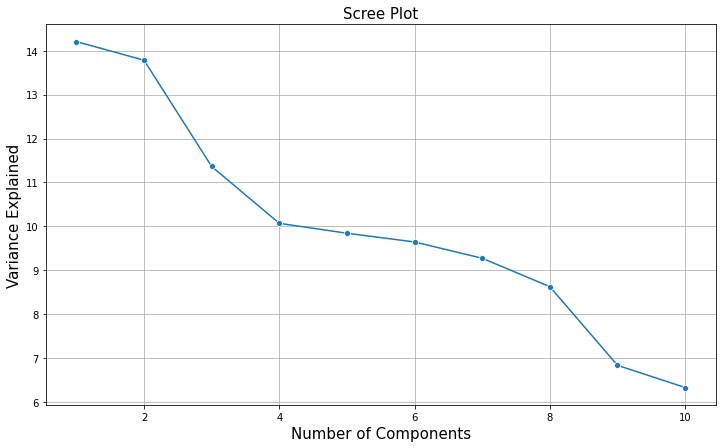

In [45]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

# The two most important Principal Components

In [46]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in oneshot
from sklearn.decomposition import PCA
# NOTE - we are generating only 2 PCA dimensions (dimensionality reduction from 16 to 2)
pca = PCA(n_components=2, random_state=123)
new_data_pca = pca.fit_transform(new_data_scaled)
new_data_pca.transpose() # Component output

array([[-1.1776288 , -1.76047266,  1.08603885, ...,  4.41271953,
         4.71977123,  4.8425288 ],
       [-2.10360479, -1.66042671, -3.01678103, ..., -0.78351858,
        -0.39440054, -0.40555972]])

In [48]:
array = new_data.values

In [49]:
X = array[:,0:8]
Y = array[:,8]

In [50]:
# feature extraction
pca = PCA(n_components=8)
fit = pca.fit(new_data)

# Selecting only 8 features using PCA

In [51]:
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [8.98811890e-01 1.01187901e-01 4.10442103e-08 3.62878850e-08
 3.51348561e-08 3.29134374e-08 2.98755826e-08 1.98124123e-08]
[[ 1.78840196e-03 -2.06988253e-05  5.17863365e-06  3.09938435e-06
   4.14451289e-06  9.37237311e-06  1.07579751e-06 -4.41624175e-08
  -6.84243246e-05  9.99998398e-01]
 [-9.99998400e-01  1.01334959e-05  8.64404322e-06 -2.14883469e-05
   1.42897388e-05 -1.01714887e-05  1.82856376e-05 -5.97599103e-06
  -3.34892866e-06  1.78840198e-03]
 [-6.34518521e-06  2.76806245e-01  2.62857199e-02  7.24492667e-01
   5.39256219e-01  1.53320786e-01  8.88994755e-02  1.35215882e-01
   2.39388290e-01  1.59777138e-05]
 [-1.66221980e-05  5.05608978e-01 -2.45692162e-02  9.30732081e-02
  -3.85081346e-01 -9.28691980e-03 -7.19129909e-01  2.52911405e-02
   2.62548915e-01  3.07565560e-05]
 [ 2.01664593e-05  6.80098837e-01 -6.17849991e-04 -2.28358036e-01
  -2.14643151e-01 -1.85525276e-02  6.32274136e-01 -4.72892205e-02
   1.92080883e-01  2.82763854e-05]
 [-2.15957133e-05 -3.7